In [ ]:
import pandas as pd

# Carregar os arquivos CSV em objetos DataFrame
netflix = pd.read_csv("/content/netflix_titles.csv")
prime = pd.read_csv("/content/amazon_prime_titles.csv")

# Verificar o tamanho dos objetos DataFrame
print("Netflix:", netflix.shape)
print("Prime:", prime.shape)

# Verificar se há dados duplicados nos objetos DataFrame
print("Netflix duplicados:", netflix.duplicated().sum())
print("Prime duplicados:", prime.duplicated().sum())

# Remover as linhas duplicadas dos objetos DataFrame
netflix = netflix.drop_duplicates()
prime = prime.drop_duplicates()

# Verificar se há valores nulos nos objetos DataFrame
print("Netflix nulos:\n", netflix.isnull().sum())
print("Prime nulos:\n", prime.isnull().sum())

# Remover as linhas que contêm valores nulos dos objetos DataFrame
netflix = netflix.dropna()
prime = prime.dropna()

# Salvar os objetos DataFrame limpos em novos arquivos CSV
netflix.to_csv("netflix_clean.csv", index=False)
prime.to_csv("prime_clean.csv", index=False)

1. Top 10 atores/atrizes considerando todos os dados:

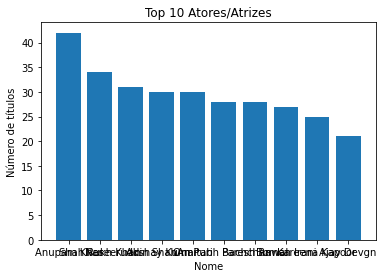

In [3]:
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
netflix = pd.read_csv("netflix_clean.csv")

# Obter contagem dos atores/atrizes
actors = netflix["cast"].str.split(", ", expand=True).stack().value_counts()

# Selecionar top 10
top_actors = actors[:10]

# Plotar gráfico de barras
plt.bar(top_actors.index, top_actors.values)
plt.title("Top 10 Atores/Atrizes")
plt.xlabel("Nome")
plt.ylabel("Número de títulos")
plt.show()

2. Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas:

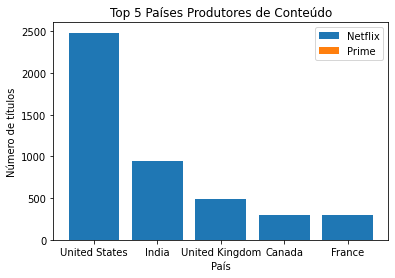

In [4]:
# Carregar os arquivos CSV
netflix = pd.read_csv("netflix_clean.csv")
prime = pd.read_csv("prime_clean.csv")

# Obter contagem dos países
netflix_countries = netflix["country"].str.split(", ", expand=True).stack().value_counts()
prime_countries = prime["country"].str.split(", ", expand=True).stack().value_counts()

# Selecionar top 5 de cada plataforma
top_netflix_countries = netflix_countries[:5]
top_prime_countries = prime_countries[:5]

# Plotar gráfico de barras comparativo
fig, ax = plt.subplots()
ax.bar(top_netflix_countries.index, top_netflix_countries.values, label="Netflix")
ax.bar(top_prime_countries.index, top_prime_countries.values, label="Prime")
ax.set_title("Top 5 Países Produtores de Conteúdo")
ax.set_xlabel("País")
ax.set_ylabel("Número de títulos")
ax.legend()
plt.show()

3. Mês no qual há mais adições de filmes na plataforma Netflix:


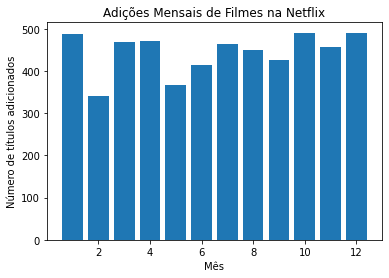

In [5]:
# Carregar o arquivo CSV
netflix = pd.read_csv("netflix_clean.csv")

# Converter a coluna "date_added" para o formato de data
netflix["date_added"] = pd.to_datetime(netflix["date_added"])

# Obter contagem de adições por mês
netflix_monthly_additions = netflix["date_added"].dt.month.value_counts()

# Plotar gráfico de barras
plt.bar(netflix_monthly_additions.index, netflix_monthly_additions.values)
plt.title("Adições Mensais de Filmes na Netflix")
plt.xlabel("Mês")
plt.ylabel("Número de títulos adicionados")
plt.show()

4. Quantidade de filmes listados como comédia:


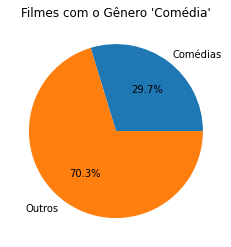

In [6]:
# Carregar o arquivo CSV
netflix = pd.read_csv("netflix_clean.csv")

# Obter contagem de filmes com o gênero "Comédia"
comedy_movies = netflix["listed_in"].str.contains("Comedies")
comedy_movies_count = comedy_movies.sum()

# Plotar gráfico de pizza
labels = ["Comédias", "Outros"]
sizes = [comedy_movies_count, len(netflix) - comedy_movies_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Filmes com o Gênero 'Comédia'")
plt.show()

5. Lista de todos os gêneros de filmes:


In [7]:
# Carregar o arquivo CSV
netflix = pd.read_csv("netflix_clean.csv")

# Obter lista de todos os gêneros
genres = netflix["listed_in"].str.split(", ").explode().unique()

# Imprimir lista de gêneros
print(genres)

['Dramas' 'Independent Movies' 'International Movies' 'British TV Shows'
 'Reality TV' 'Comedies' 'Romantic Movies' 'Horror Movies'
 'Sci-Fi & Fantasy' 'Thrillers' 'Action & Adventure' 'Classic Movies'
 'Anime Features' 'Children & Family Movies' 'Documentaries'
 'Music & Musicals' 'Cult Movies' 'Faith & Spirituality' 'LGBTQ Movies'
 'Crime TV Shows' 'International TV Shows' 'TV Dramas' 'Romantic TV Shows'
 'Spanish-Language TV Shows' 'Stand-Up Comedy' 'TV Shows' 'Movies'
 'TV Comedies' 'Sports Movies' 'TV Action & Adventure'
 'TV Sci-Fi & Fantasy' 'TV Mysteries' 'Docuseries' 'Anime Series'
 'TV Horror' 'Teen TV Shows' 'Korean TV Shows'
 'Stand-Up Comedy & Talk Shows' "Kids' TV" 'Classic & Cult TV'
 'TV Thrillers' 'Science & Nature TV']


6. A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas:



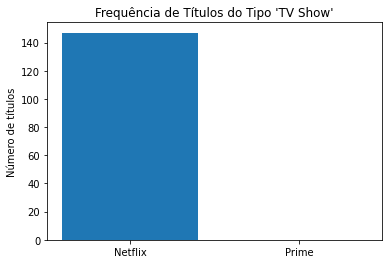

In [9]:
# Carregar os arquivos CSV
netflix = pd.read_csv("netflix_clean.csv")
prime = pd.read_csv("prime_clean.csv")

# Obter contagem de títulos do tipo "TV Show"
netflix_tv_shows_count = (netflix["type"] == "TV Show").sum()
prime_tv_shows_count = (prime["type"] == "TV Show").sum()

# Plotar gráfico de barras comparativo
fig, ax = plt.subplots()
ax.bar(["Netflix", "Prime"], [netflix_tv_shows_count, prime_tv_shows_count])
ax.set_title("Frequência de Títulos do Tipo 'TV Show'")
ax.set_ylabel("Número de títulos")
plt.show()

7. A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas:

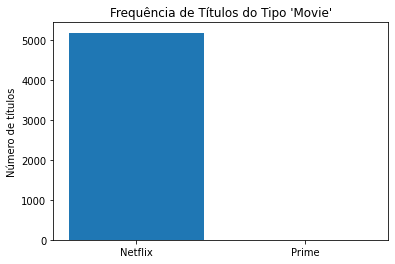

In [10]:
# Carregar os arquivos CSV
netflix = pd.read_csv("netflix_clean.csv")
prime = pd.read_csv("prime_clean.csv")

# Obter contagem de títulos do tipo "Movie"
netflix_movies_count = (netflix["type"] == "Movie").sum()
prime_movies_count = (prime["type"] == "Movie").sum()

# Plotar gráfico de barras comparativo
fig, ax = plt.subplots()
ax.bar(["Netflix", "Prime"], [netflix_movies_count, prime_movies_count])
ax.set_title("Frequência de Títulos do Tipo 'Movie'")
ax.set_ylabel("Número de títulos")
plt.show()